**Do datasets work?**
* I think I don't need the `isinstance` dataset with `.copy()` if I can just use the `apply_ufunc`.

**Other stuff**
* Various NaN policies (return NaN, interpolate, skip)

In [1]:
%matplotlib inline
import numpy as np
import xarray as xr
import numpy.polynomial.polynomial as poly
import cftime

In [72]:
from scipy.stats import linregress as lreg
from esmtools.utils import convert_time

def linear_regression(x, y, dim="time"):
    x = convert_time(x, dim)
    results = xr.apply_ufunc(
        lreg,
        x,
        da,
        input_core_dims=[[dim], [dim]],
        output_core_dims=[[], [], [], [], []],
        vectorize=False,
        dask="allowed",
    )
    return slopes

In [70]:
ds = xr.open_dataset('/Users/ribr5703/Desktop/dev/climpred-data/CESM-DP-LE.SST.eastern_pacific.nc')
ds = ds.SST.isel(lead=0).rename({'init': 'time'})

In [71]:
x = ds.time
y = ds

In [73]:
linear_regression(x, y)

ValueError: indexes along dimension 'time' are not equal

In [24]:
ds = xr.open_dataset('/Users/ribr5703/Desktop/dev/climpred-data/CESM-DP-LE.SST.eastern_pacific.nc')
ds = ds.SST.isel(lead=0).rename({'init': 'time'})

In this case, we give integers for time, so it just computes the delta x equally and returns the slope in units of per year.

In [4]:
import esmtools as et

In [5]:
A = et.stats.compute_slope(ds.time, ds)

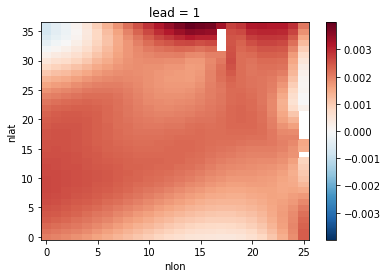

In [6]:
A.plot()

`numpy` datetime

In [15]:
da = xr.open_dataset('/Users/ribr5703/Desktop/dev/climpred-data/CESM-DP-LE.SST.eastern_pacific.nc')
da = da.SST.isel(lead=0).rename({'init': 'time'})
da['time'] = np.arange('1900-12-31', '1964-12-31', dtype='datetime64[Y]')

In [16]:
ds = da.to_dataset()

In [17]:
ds['SSS'] = da

In [18]:
B = et.stats.compute_slope(ds.time, ds)

In [21]:
B

<xarray.Dataset>
Dimensions:  (nlat: 37, nlon: 26)
Coordinates:
    lead     int32 1
    TLAT     (nlat, nlon) float64 ...
    TLONG    (nlat, nlon) float64 ...
    TAREA    (nlat, nlon) float64 ...
Dimensions without coordinates: nlat, nlon
Data variables:
    SST      (nlat, nlon) float64 5.602e-06 5.437e-06 ... 7.998e-06 5.783e-06
    SSS      (nlat, nlon) float64 5.602e-06 5.437e-06 ... 7.998e-06 5.783e-06

In [ ]:
(B * 365.25).plot()

`cftime` datetime

In [ ]:
ds = xr.open_dataset('/Users/ribr5703/Desktop/dev/climpred-data/CESM-DP-LE.SST.eastern_pacific.nc')
ds = ds.SST.isel(lead=0).rename({'init': 'time'})
ds['time'] = xr.cftime_range('1900', '1964', freq='Y')

In [ ]:
C = compute_slope(ds.time, ds)

In [ ]:
(C*365).plot()

In [ ]:
assert (isinstance(ds.time, xr.CFTimeIndex) or np.issubdtype(ds.time, np.datetime64)), f'{type(test)} is not a datetime index'